# 기본 설정

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS as stopwords
from PIL import Image, ImageFilter
from wordcloud import ImageColorGenerator
from matplotlib import font_manager, rc
from collections import Counter
import konlpy
from konlpy.tag import Mecab
import time
import seaborn as sns
import matplotlib.pyplot as plt
from random import shuffle
import json
from tqdm.notebook import tqdm
tqdm.pandas()
import gensim 
from gensim.models import Word2Vec, FastText, Doc2Vec
import fasttext
from bokeh.plotting import figure, output_file, save
from bokeh.io import curdoc, show
from bokeh.transform import factor_cmap, factor_mark
from bokeh.models import ColumnDataSource, Grid, LinearAxis, Plot, Text
# from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource, value
from sklearn.feature_extraction.text import TfidfVectorizer
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource, value
output_notebook()
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tqdm/std.py:666: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


Loading BokehJS ...

In [2]:
bills = pd.read_csv('/Users/junghyunwoo/혀누에-의한-혀누를-위한-혀누의/공부공부공부공부/대학 이후/코딩 관련/개인프로젝트_국회의원 추천 (20대)/1차 데이터 및 jupyter/bills_24839_all_cleansed.csv')
senators = pd.read_csv('/Users/junghyunwoo/혀누에-의한-혀누를-위한-혀누의/공부공부공부공부/대학 이후/코딩 관련/개인프로젝트_국회의원 추천 (20대)/1차 데이터 및 jupyter/(원본) assembly_memebers_295.csv')

In [3]:
senators['한글이름'] = senators['이름'].str.split(' ').str[0]
senators['한자이름'] = senators['이름'].str.split(' ').str[1]

In [4]:
bills = bills[bills['발의자'] != '위원장']
bills = bills[bills['발의자'] != '정부'] 
bills = bills.dropna()

법안수/평균발의의원

# 발의법안수/평균발의의원 수

In [5]:
def count_bills(name, bills_df):
    df_temp = bills_df[bills_df['발의자'].str.contains(name)]
    bills_deleted = df_temp[(df_temp['상태']=='폐기') | (df_temp['상태']=='철회')].shape[0]
    df_temp_save = df_temp[~(df_temp['상태']=='폐기') & ~(df_temp['상태']=='철회')]
    bills_일부개정법률안 = df_temp_save[df_temp_save['법안명'].str.contains('일부개정법률안')].shape[0]
    bills_전부개정법률안 = df_temp_save[df_temp_save['법안명'].str.contains('전부개정법률안')].shape[0]
    bills_제정법안 = df_temp_save[(~df_temp_save['법안명'].str.contains('일부개정법률안'))& (~df_temp_save['법안명'].str.contains('전부개정법률안'))].shape[0]
    dict_ = {'일부개정법률안 비율': str(round((bills_일부개정법률안/df_temp.shape[0])*100,2))+'%',
            '전부개정법률안 비율': str(round((bills_전부개정법률안/df_temp.shape[0])*100,2))+'%',
            '제정법률안 비율': str(round((bills_제정법안/df_temp.shape[0])*100,2))+"%",
            '폐기법률안 비율': str(round((bills_deleted/df_temp.shape[0])*100,2))+'%'}
    return dict_

def count_bills_all(bills_df):
    df_temp = bills_df
    bills_deleted = df_temp[(df_temp['상태']=='폐기') | (df_temp['상태']=='철회')].shape[0]
    df_temp_save = df_temp[~(df_temp['상태']=='폐기') & ~(df_temp['상태']=='철회')]
    bills_일부개정법률안 = df_temp_save[df_temp_save['법안명'].str.contains('일부개정법률안')].shape[0]
    bills_전부개정법률안 = df_temp_save[df_temp_save['법안명'].str.contains('전부개정법률안')].shape[0]
    bills_제정법안 = df_temp_save[(~df_temp_save['법안명'].str.contains('일부개정법률안'))& (~df_temp_save['법안명'].str.contains('전부개정법률안'))].shape[0]
    dict_ = {'일부개정법률안 비율': str(round((bills_일부개정법률안/df_temp.shape[0])*100,2))+'%',
            '전부개정법률안 비율': str(round((bills_전부개정법률안/df_temp.shape[0])*100,2))+'%',
            '제정법률안 비율': str(round((bills_제정법안/df_temp.shape[0])*100,2))+"%",
            '폐기법률안 비율': str(round((bills_deleted/df_temp.shape[0])*100,2))+'%'}
    return dict_


def get_quantile(senator):
    result = result
    return result

In [6]:
def count_senators(data):
    data = [x for x in data if '/' in x]
    return len(data)

In [6]:
senators

,이름,정당,선거구,당선횟수,소속위원회,학력,주요경력,연락처,이메일,대표발의법안수,위원회 출석률,본회의 출석률,재산,한글이름,한자이름
0,강길부 姜吉夫,무소속,울산 울주군,"4선 [ 17대, 18대, 19대, 20대 ]",산업통상자원중소벤처기업위원회,언양농업고등학교/성균관대학교 행정학과/서울대학교환경대학원 도시계획학 석사,6대 건설교통부 차관/한국감정원 원장,의원회관 606호 | 전화 02-784-5073 | 팩스 02-788-0103,shinmut@assembly.go.kr,2,93.65 %,82.88 %,"총계 3,386,959 3,436,703 3,394,464 3,762,663",강길부,姜吉夫
1,강병원 姜炳遠,더불어민주당,서울 은평구을,1선,기획재정위원회,서울대학교 농업생명과학대학 농경제학과,서울대학교 총학생회장/노무현대통령 청와대 행정관,의원회관 610호 | 전화 02-784-1422 | 팩스 02-788-0118,kangbw89@gmail.com,14,98.15 %,98.63 %,"총계 662,157 754,761 888,275 989,750",강병원,姜炳遠
2,강석진 姜錫振,미래통합당,경남 산청군함양군거창군합천군,1선,농림축산식품해양수산위원회,연세대학교 행정대학원,새누리당 최경환 원내대표 비서실장/경남 거창군수,의원회관 542호 | 전화 02-784-1460 | 팩스 02-788-0119,ksjv7900@naver.com,19,98.36 %,93.84 %,"총계 365,671 472,584 532,440 724,182",강석진,姜錫振
3,강석호 姜碩鎬,미래통합당,경북 영양군영덕군봉화군울진군,"3선 [ 18대, 19대, 20대 ]",농림축산식품해양수산위원회,한국외국어대학교 서양어대학 스페인어과,새누리당 제1사무부총장/경상북도의회 의원/스텔베르그&삼일 대표이사,의원회관 707호 | 전화 02-784-2374 | 팩스 02-788-0105,kangsh@na.go.kr,8,88.46 %,86.99 %,"총계 15,371,209 13,904,477 16,757,244 16,732,344",강석호,姜碩鎬
4,강창일 姜昌一,더불어민주당,제주 제주시갑,"4선 [ 17대, 18대, 19대, 20대 ]",행정안전위원회,서울대학교 국사학과/도쿄대학교대학원 문학 박사,5.18기념재단 이사/배재대학교 교무처장,의원회관 806호 | 전화 02-784-6084 | 팩스 02-788-0108,kangci@assembly.go.kr,10,83.33 %,90.41 %,"총계 1,618,382 2,111,355 2,257,761 1,866,353",강창일,姜昌一
5,강효상 姜孝祥,미래통합당,비례대표,1선,공공부문 채용비리 의혹과 관련된 국정조사특별위원회,서울대학교 법과대학 사법학과 졸업,TV조선 보도본부장/조선일보 편집국장,의원회관 418호 | 전화 02-784-6195 | 팩스 02-788-0400,hyoshang@gmail.com,12,88.89 %,83.56 %,"총계 2,696,829 2,824,614 3,096,682 3,468,624",강효상,姜孝祥
6,강훈식 姜勳植,더불어민주당,충남 아산시을,1선,국토교통위원회,건국대학교 경영정보학과,더불어민주당 아산을 지역위원장/동국대 언론정보대학원 겸임교수,의원회관 640호 | 전화 02-784-1045 | 팩스 02-788-0263,gohoonsik@gmail.com,7,83.33 %,93.84 %,"총계 333,560 209,253 298,004 506,666",강훈식,姜勳植
7,경대수 慶大秀,미래통합당,충북 증평군진천군음성군,"2선 [ 19대, 20대 ]",농림축산식품해양수산위원회,경동고등학교/서울대학교/서울대학교 대학원 법학과 석사 수료,새누리당 충북도당 위원장/대검찰청 마약조직범죄부장 검사장/제주지방검찰청 검사장/제2...,의원회관 941호 | 전화 02-784-3977 | 팩스 02-788-0110,kyungds@na.go.kr,7,98.36 %,93.84 %,"총계 681,739 949,726 751,248 862,403",경대수,慶大秀
8,고용진 高榕禛,더불어민주당,서울 노원구갑,1선,국회운영위원회,서울대학교대학원 언론정보학과 석사,서울시의회의원/노무현정부 청와대 행정관/더불어민주당 노원갑 지역위원장,의원회관 1005호 | 전화 02-784-4840 | 팩스 02-788-0171,gogoyongjin@naver.com,4,100.00 %,95.89 %,"총계 632,899 875,972 1,184,064 1,576,501",고용진,高榕禛
9,곽대훈 郭大勳,미래통합당,대구 달서구갑,1선,산업통상자원중소벤처기업위원회,서울대학교 행정대학원 행정학 석사 수료,대구광역시 달서구청장/대구광역시 행정관리국장,의원회관 530호 | 전화 02-784-0790 | 팩스 02-788-0331,dhkwak605@naver.com,4,86.57 %,91.10 %,"총계 1,620,248 1,701,690 1,741,160 1,822,481",곽대훈,郭大勳


In [7]:
bills

,bill_id,입안일,법안명,법안내용,발의자,상태,법안명_이름만,법안명_법안내용
0,0,2020-02-24,출입국관리법 일부개정법률안(정성호의원 등 10인),관광 등 단기체류 목적으로 입국하는 외국인은 출입국관리공무원의 입국심사를 받을 때...,정성호(더불어민주당/鄭成湖) 김민기(더불어민주당/金敏基) 김병관(더불어민주당/金炳官...,계류,출입국관리법 일부개정법률안,출입국관리법 일부개정법률안 관광 등 단기체류 목적으로 입국하는 외국인은 출입국관리...
1,1,2020-02-24,통신비밀보호법 일부개정법률안(추혜선의원 등 10인),2018. 8. 30. 헌법재판소는 국가정보원 인터넷회선감청(이른바 ‘패킷감청’)...,추혜선(정의당/秋惠仙) 김종대(정의당/金鍾大) 김종훈(민중당/金鍾勳) 박선숙(바른미...,계류,통신비밀보호법 일부개정법률안,통신비밀보호법 일부개정법률안 2018. 8. 30. 헌법재판소는 국가정보원 인터넷...
2,2,2020-02-24,공익사업을 위한 토지 등의 취득 및 보상에 관한 법률 일부개정법률안(신창현의원 등 ...,"현행 법령상 도시가스 미공급 지역의 경우, 도시가스 사업자가 도시가스 공급을 위해...",신창현(더불어민주당/申昌賢) 김경협(더불어민주당/金炅俠) 김병기(더불어민주당/金炳基...,계류,공익사업을 위한 토지 등의 취득 및 보상에 관한 법률 일부개정법률안,공익사업을 위한 토지 등의 취득 및 보상에 관한 법률 일부개정법률안 현행 법령상 ...
4,4,2020-02-20,중소기업진흥에 관한 법률 일부개정법률안(서영교의원 등 10인),최근 코로나바이러스감염증-19(COVID-19)의 확산으로 직·간접적으로 경제적 ...,서영교(더불어민주당/徐瑛敎) 김상희(더불어민주당/金相姬) 김철민(더불어민주당/金哲玟...,계류,중소기업진흥에 관한 법률 일부개정법률안,중소기업진흥에 관한 법률 일부개정법률안 최근 코로나바이러스감염증-19(COVID-...
5,5,2020-02-19,주거급여법 일부개정법률안(함진규의원 등 10인),현행법은 「국민기초생활 보장법」 관련 규정을 준용하여 주거급여를 실시하기 위한 비...,함진규(자유한국당/咸珍圭) 강석진(자유한국당/姜錫振) 김성원(자유한국당/金成願) 김...,계류,주거급여법 일부개정법률안,주거급여법 일부개정법률안 현행법은 「국민기초생활 보장법」 관련 규정을 준용하여 주...
...,...,...,...,...,...,...,...,...
23774,23774,2016-05-30,교육기본법 일부개정법률안(이찬열의원 등 10인),"한편, 최근 저출산 문제의 해결을 위하여 지방자치단체별로 다양한 공공요금의 할인, ...",이찬열(더불어민주당/李燦烈) 김경협(더불어민주당/金炅俠) 백재현(더불어민주당/白在鉉...,계류,교육기본법 일부개정법률안,"교육기본법 일부개정법률안 한편, 최근 저출산 문제의 해결을 위하여 지방자치단체별로 ..."
23775,23775,2016-05-30,정부조직법 일부개정법률안(이종배의원 등 11인),통계청에 따르면 우리나라는 2000년에 65세 이상의 노인인구가 전체인구의 7%로...,이종배(새누리당/李鍾培) 권성동(새누리당/權性東) 김재경(새누리당/金在庚) 박덕흠(...,계류,정부조직법 일부개정법률안,정부조직법 일부개정법률안 통계청에 따르면 우리나라는 2000년에 65세 이상의 노...
23776,23776,2016-05-30,근로기준법 일부개정법률안(이찬열의원 등 11인),지난 2015년 12월 고용노동부에서 발간한 ‘우리나라 노동시장의 모습’을 살펴보...,이찬열(더불어민주당/李燦烈) 김경협(더불어민주당/金炅俠) 김현미(더불어민주당/金賢美...,계류,근로기준법 일부개정법률안,근로기준법 일부개정법률안 지난 2015년 12월 고용노동부에서 발간한 ‘우리나라 ...
23777,23777,2016-05-30,빅데이터의 이용 및 산업진흥 등에 관한 법률안(배덕광의원 등 14인),빅데이터산업은 사물인터넷·클라우드 컴퓨팅 산업 등과 함께 정보통신산업의 성장을 이...,배덕광(새누리당/裵德光) 김세연(새누리당/金世淵) 김정훈(새누리당/金正薰) 김한표(...,계류,빅데이터의 이용 및 산업진흥 등에 관한 법률안,빅데이터의 이용 및 산업진흥 등에 관한 법률안 빅데이터산업은 사물인터넷·클라우드 ...


# 의원별 법안 참여자 수 세기

In [7]:
dict_count_biils = {}
for row in tqdm(senators.itertuples()):
    dict_temp = {}
    dict_temp['한글이름'] = row[-2]
    
    # Get the dataframe
    df_temp = bills[bills['발의자'].str.contains(row[-2])]
    bills_전부개정법률안 = df_temp[df_temp['법안명'].str.contains('전부개정법률안')]
    bills_제정법안 = df_temp[(~df_temp['법안명'].str.contains('일부개정법률안'))& (~df_temp['법안명'].str.contains('전부개정법률안'))]
    bills_total = pd.concat([bills_제정법안, bills_전부개정법률안])
    
    # count mean senators proposing 
    bills_total['발의자 수'] = bills_total['발의자'].str.split(' ').map(count_senators)
    
    # save in dictionary
    dict_temp['전체 발의법안 수'] = bills_total.shape[0]
    if dict_temp['전체 발의법안 수'] == 0:
        dict_temp['평균 발의자 수'] = 0.000000000000009
    else:    
        dict_temp['평균 발의자 수'] = round(bills_total['발의자 수'].mean())

    dict_count_biils[row[-1]] = dict_temp

### 결과

In [29]:
df_result = pd.DataFrame(dict_count_biils).T.reset_index()
df_result 

,index,한글이름,전체 발의법안 수,평균 발의자 수
0,姜吉夫,강길부,23,67
1,姜炳遠,강병원,94,38
2,姜錫振,강석진,61,47
3,姜碩鎬,강석호,63,47
4,姜昌一,강창일,78,38
5,姜孝祥,강효상,38,63
6,姜勳植,강훈식,116,34
7,慶大秀,경대수,67,43
8,高榕禛,고용진,75,34
9,郭大勳,곽대훈,74,46


In [30]:
df_result['법안수/평균 발의자 수'] = df_result['전체 발의법안 수'] / df_result['평균 발의자 수'] 

In [31]:
df_result.sort_values(by='법안수/평균 발의자 수')

,index,한글이름,전체 발의법안 수,평균 발의자 수,법안수/평균 발의자 수
245,鄭恩惠,정은혜,0,9e-15,0
284,許允貞,허윤정,0,9e-15,0
248,鄭点植,정점식,2,62,0.0322581
95,朴炳錫,박병석,8,132,0.0606061
266,陳永,진영,9,86,0.104651
38,金成植,김성식,12,62,0.193548
43,金星煥,김성환,9,42,0.214286
258,趙應天,조응천,19,61,0.311475
118,徐淸源,서청원,23,69,0.333333
257,趙源震,조원진,21,63,0.333333


### 허윤정, 정읜혜 의원 제외 (발의법안이 0)

In [32]:
df_result = df_result[df_result['법안수/평균 발의자 수'] != 0]

In [33]:
df_result.sort_values(by='법안수/평균 발의자 수')

,index,한글이름,전체 발의법안 수,평균 발의자 수,법안수/평균 발의자 수
248,鄭点植,정점식,2,62,0.0322581
95,朴炳錫,박병석,8,132,0.0606061
266,陳永,진영,9,86,0.104651
38,金成植,김성식,12,62,0.193548
43,金星煥,김성환,9,42,0.214286
258,趙應天,조응천,19,61,0.311475
118,徐淸源,서청원,23,69,0.333333
257,趙源震,조원진,21,63,0.333333
0,姜吉夫,강길부,23,67,0.343284
201,李貞鉉,이정현,24,63,0.380952


In [34]:
df_result['법안수/평균 발의자 수'] = df_result['법안수/평균 발의자 수'].astype(float)

<ipython-input-34-c4363b884b23>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_result['법안수/평균 발의자 수'] = df_result['법안수/평균 발의자 수'].astype(float)


### exponential 씌우기

In [35]:
df_result['exp'] = np.exp(df_result['법안수/평균 발의자 수'])

<ipython-input-35-f7dcf122ace3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_result['exp'] = np.exp(df_result['법안수/평균 발의자 수'])


In [36]:
df_result

,index,한글이름,전체 발의법안 수,평균 발의자 수,법안수/평균 발의자 수,exp
0,姜吉夫,강길부,23,67,0.343284,1.409568
1,姜炳遠,강병원,94,38,2.473684,11.866084
2,姜錫振,강석진,61,47,1.297872,3.661498
3,姜碩鎬,강석호,63,47,1.340426,3.820669
4,姜昌一,강창일,78,38,2.052632,7.788370
5,姜孝祥,강효상,38,63,0.603175,1.827912
6,姜勳植,강훈식,116,34,3.411765,30.318701
7,慶大秀,경대수,67,43,1.558140,4.749976
8,高榕禛,고용진,75,34,2.205882,9.078258
9,郭大勳,곽대훈,74,46,1.608696,4.996290


# min, max

In [39]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
scaler = MinMaxScaler()
df_result['MinMax'] = scaler.fit_transform(df_result[['법안수/평균 발의자 수']])

<ipython-input-40-db3715c2bc9a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_result['MinMax'] = scaler.fit_transform(df_result[['법안수/평균 발의자 수']])


In [41]:
df_result

,index,한글이름,전체 발의법안 수,평균 발의자 수,법안수/평균 발의자 수,exp,MinMax
0,姜吉夫,강길부,23,67,0.343284,1.409568,0.028732
1,姜炳遠,강병원,94,38,2.473684,11.866084,0.225538
2,姜錫振,강석진,61,47,1.297872,3.661498,0.116917
3,姜碩鎬,강석호,63,47,1.340426,3.820669,0.120848
4,姜昌一,강창일,78,38,2.052632,7.788370,0.186642
5,姜孝祥,강효상,38,63,0.603175,1.827912,0.052741
6,姜勳植,강훈식,116,34,3.411765,30.318701,0.312198
7,慶大秀,경대수,67,43,1.558140,4.749976,0.140961
8,高榕禛,고용진,75,34,2.205882,9.078258,0.200799
9,郭大勳,곽대훈,74,46,1.608696,4.996290,0.145631


### 법안수/평균 발의자 수 분포

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48277 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50504 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44512 missing from c

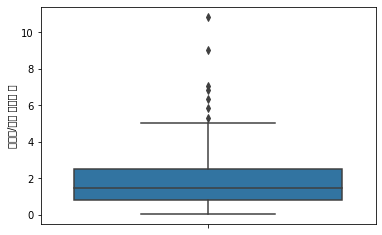

In [17]:
sns.boxplot( y="법안수/평균 발의자 수", data=df_result)

In [37]:
df_result['법안수/평균 발의자 수'].describe()

count    293.000000
mean       1.872405
std        1.423964
min        0.032258
25%        0.839286
50%        1.476190
75%        2.527778
max       10.857143
Name: 법안수/평균 발의자 수, dtype: float64

### exp 씌운거 분포

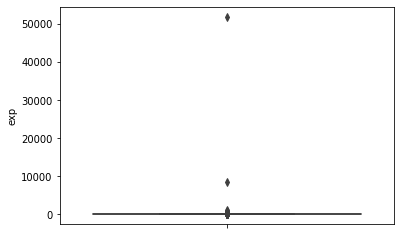

In [19]:
sns.boxplot( y="exp", data=df_result)

In [38]:
df_result['exp'].describe()

count      293.000000
mean       229.469463
std       3070.945131
min          1.032784
25%          2.314713
50%          4.376242
75%         12.525640
max      51903.570219
Name: exp, dtype: float64

### MinMax 분포

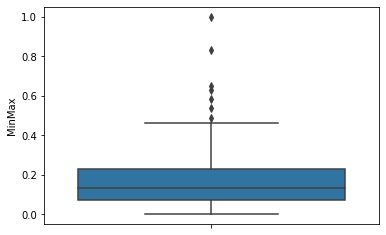

In [42]:
sns.boxplot( y="MinMax", data=df_result)

In [43]:
df_result['MinMax'].describe()

count    293.000000
mean       0.169992
std        0.131545
min        0.000000
25%        0.074553
50%        0.133390
75%        0.230535
max        1.000000
Name: MinMax, dtype: float64